# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Os scores de crédito são um método comum de controle de risco no setor financeiro. Ele usa informações e dados pessoais enviados por solicitantes de cartão de crédito para prever a probabilidade de inadimplências futuras e empréstimos de cartão de crédito. A instituição financeira pode então decidir se deve ou não emitir um cartão de crédito para o solicitante. As pontuações de crédito podem quantificar objetivamente a magnitude do risco.
 
Atualmente, com o desenvolvimento de algoritmos de aprendizado de máquina, métodos mais preditivos, como Boosting, Random Forest e Support Vector Machines, foram introduzidos nos scores de crédito. No entanto, esses métodos geralmente não têm boa transparência. Pode ser difícil fornecer aos clientes e reguladores um motivo para rejeição ou aceitação.

#### Objetivo

O objetivo da modelagem é classificar o risco de inadimplência, ou como se diz no meio, o risco de default. Para efeitos deste estudo, um cliente em default é aquele que está em 60 dias de atraso ou mais. Então classificaremos os clientes como 'bons' e 'maus' assim:

###### Maus pagadores:
São aqueles que entraram em 'default' (atraso 60 dias ou mais) nos 24 meses seguintes à aquisição do cartão de crédito.

###### Bons pagadores: 
São considerados todos os demais.

###### Excluídos: 
Clientes que não adquiriram um cartão de crédito (seja por recusa, seja por desistência) não possuem informações de pagamento, portanto não se pode identificar se são bons ou maus. Há uma longa discussão e literatura sobre inferência de rejeitados que está fora do escopo deste exercício.

Desse modo, a instituição financeira poderá conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

## Etapa 2 Crisp-DM: Entendimento dos dados

Visando conhecer o risco default de seus clientes, a instituição financeira conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, além de algumas informações cadastrais tomadas como variáveis que já existentes em seu banco de dados.

### Dicionário de dados


| Variável                | Descrição                                            | Tipo         |
| ----------------------- |:----------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis          | object       |
| id_cliente              |  Código de identificação do cliente                  | int64        |
| sexo                    |  Sexo do cliente                                     | object       |
| posse_de_veiculo        |  Indica se o cliente possui veículo                  | bool         |
| posse_de_imovel         |  Indica se o cliente possui imóvel                   | bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                     | int64        |
| tipo_renda              |  Tipo de renda do cliente                            | object       |
| educacao                |  Grau de instrução do cliente                        | object       |
| estado_civil            |  Estado civil do cliente                             | object       |
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada,etc)| object       |
| idade                   |  Idade do cliente                                    | int64        |
| tempo_emprego           |  Tempo no emprego atual                              | float64      |
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência       | float64      |
| renda                   |   Renda em reais                                     | float64      |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [82]:
df = pd.read_csv('./input/previsao_de_renda.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [84]:
# METADADOS DA BASE
metadados = pd.DataFrame(df.nunique()).reset_index()
metadados.columns=['variaveis','qtd_categorias']
tp = []
tp = list(df.dtypes)
metadados['tipo_dados'] = tp
metadados.set_index('variaveis')

,qtd_categorias,tipo_dados
variaveis,,
Unnamed: 0,15000,int64
data_ref,15,object
id_cliente,9845,int64
sexo,2,object
posse_de_veiculo,2,bool
posse_de_imovel,2,bool
qtd_filhos,8,int64
tipo_renda,5,object
educacao,5,object


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas



<span style="color:red">ESCREVER AQUI</span>


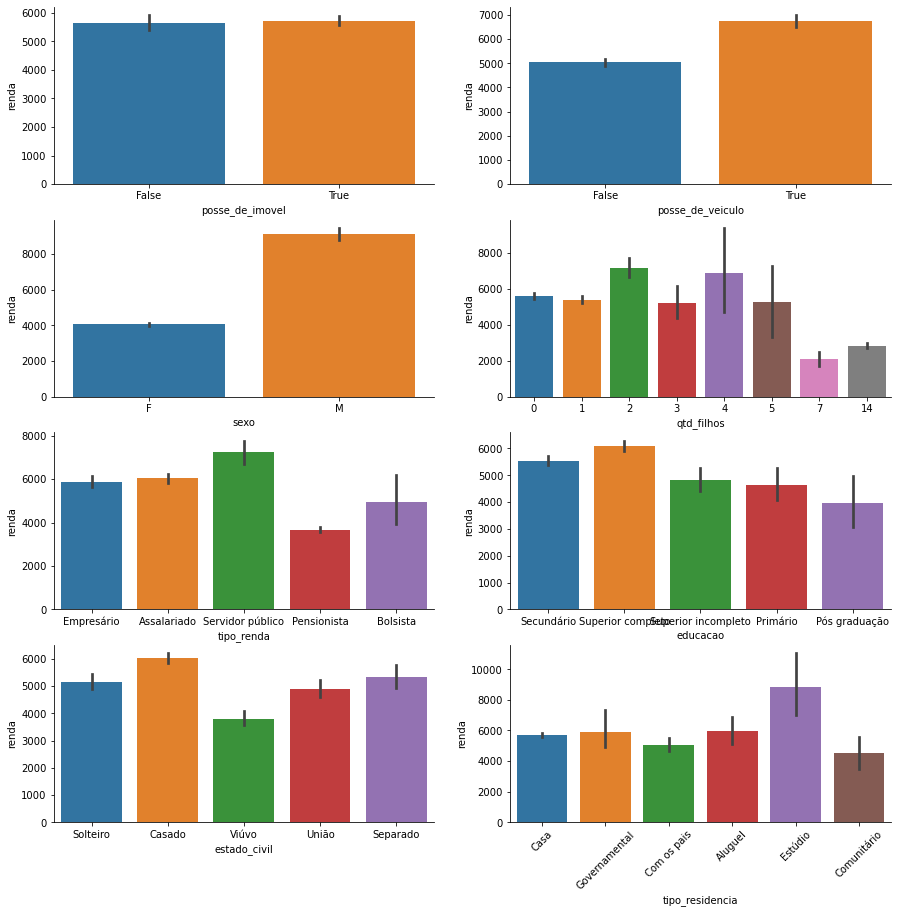

In [7]:
plt.close('all')
plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(4, 2)


sns.barplot(x='posse_de_imovel',y='renda',data=df, ax=axes[0,0])
sns.barplot(x='posse_de_veiculo',y='renda',data=df, ax=axes[0,1])
sns.barplot(x='qtd_filhos',y='renda',data=df, ax=axes[1,1])
sns.barplot(x='sexo',y='renda',data=df, ax=axes[1,0])
sns.barplot(x='tipo_renda',y='renda',data=df, ax=axes[2,0])
sns.barplot(x='educacao',y='renda',data=df, ax=axes[2,1])
sns.barplot(x='estado_civil',y='renda',data=df, ax=axes[3,0]) 
sns.barplot(x='tipo_residencia',y='renda',data=df, ax=axes[3,1])
plt.xticks(rotation=45)
sns.despine()


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>
#### Limpeza dos dados: Remoção de duplicados e ausentes


In [85]:
df.dropna(subset=['tempo_emprego'],inplace=True)
df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.drop(['Unnamed: 0','id_cliente'],axis = 1,inplace=True)
print("\nAPÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES")
df.info()


APÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12427 entries, 0 to 12426
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12427 non-null  object 
 1   sexo                   12427 non-null  object 
 2   posse_de_veiculo       12427 non-null  bool   
 3   posse_de_imovel        12427 non-null  bool   
 4   qtd_filhos             12427 non-null  int64  
 5   tipo_renda             12427 non-null  object 
 6   educacao               12427 non-null  object 
 7   estado_civil           12427 non-null  object 
 8   tipo_residencia        12427 non-null  object 
 9   idade                  12427 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  12427 non-null  float64
 12  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 

#### Tratamento de outliers

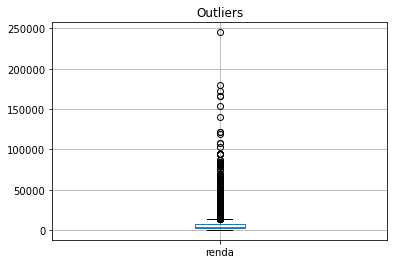

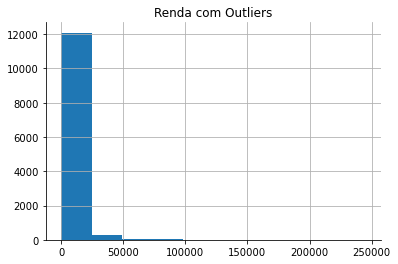

In [86]:
plt.close('all')
plt.rc('figure', figsize=(6, 4))
df.boxplot(['renda'])
plt.title('Outliers')
df.hist(['renda'])
plt.title('Renda com Outliers')
sns.despine()

In [87]:
valor = df['renda']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
# limite_inferior = Q1 - (1.5 * IIQ)
# limite_superior = Q3 + (1.5 * IIQ)
print(f'primeiro quartil = {round(Q1,2)} e terceiro = {round(Q3,2)}')
print(f'Limite Inferior = {limite_inferior}')
print(f'Limite Superior = {limite_superior}')
# print(f'Limite inferior = {round(limite_inferior,2)} e limite superior = {round(limite_superior,2)}')


primeiro quartil = 2117.23 e terceiro = 6846.65
Limite Inferior = -4976.8875
Limite Superior = 13940.7725


(11395, 13)


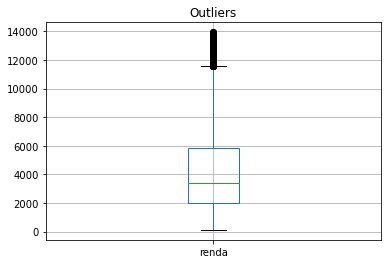

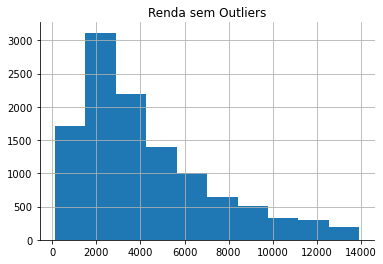

In [81]:
selecao = (valor>= limite_inferior) & (valor <= limite_superior)
renda = df[selecao]
renda.boxplot(['renda'])
plt.title('Outliers')
renda.hist(['renda'])
plt.title('Renda sem Outliers')
sns.despine()
print(renda.shape)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


In [88]:
renda.to_csv('./output/renda.csv',index=False)    
renda.drop(['data_ref'],axis = 1,inplace=True)
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11395 entries, 0 to 12426
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   11395 non-null  object 
 1   posse_de_veiculo       11395 non-null  bool   
 2   posse_de_imovel        11395 non-null  bool   
 3   qtd_filhos             11395 non-null  int64  
 4   tipo_renda             11395 non-null  object 
 5   educacao               11395 non-null  object 
 6   estado_civil           11395 non-null  object 
 7   tipo_residencia        11395 non-null  object 
 8   idade                  11395 non-null  int64  
 9   tempo_emprego          11395 non-null  float64
 10  qt_pessoas_residencia  11395 non-null  float64
 11  renda                  11395 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1001.5+ KB


### Definição das bases de teste e treinamento

In [89]:
# SEPARAÇÃO DE BASES PARA TESTE E TREINAMENTO
base = int(input('Informe o percentual para BASE TESTE: '))
print(f'\nPercentual utilizado: {base/100}')
renda_dummie = pd.get_dummies(renda, columns=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first=True)
train, test = train_test_split(renda_dummie, test_size=base/100, random_state=100)
print("\nBase Treino")
print(train.shape)
print("\nBase Teste")
print(test.shape)

Informe o percentual para BASE TESTE: 30

Percentual utilizado: 0.3

Base Treino
(7976, 25)

Base Teste
(3419, 25)


In [90]:
# CRIANDO A MATRIZ DE DESIGN UTILIZANDO TODA A BASE PARA COMPARAÇÃO
treino, teste = train_test_split(renda, test_size=base/100, random_state=100)
y, X = patsy.dmatrices('renda ~ sexo + posse_de_veiculo +posse_de_imovel +qtd_filhos +tipo_renda +educacao +estado_civil +tipo_residencia +idade +tempo_emprego +qt_pessoas_residencia', renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:52:36   Log-Likelihood:            -1.0585e+05
No. Observations:               11395   AIC:                         2.118e+05
Df Residuals:                   11370   BIC:                         2.119e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -315.3188    859.716     -0.367      0.714   -2000.511    1369.873
sexo[T.M]                         2370.8316     57.192     41.454      0.000    2258.726    2482.937
posse_de_veiculo[T.True]            82.9129     53.756      1.542      0.123     -22.459     188.284
posse_de_imovel[T.True]            319.7210     53.086      6.023      0.000     215.663     423.779
tipo_renda[T.Bolsista]             547.3296    876.253      0.625      0.532   -1170.278    2264.937
tipo_renda[T.Empresário]           530.8924     56.469      9.401      0.000     420.203     641.582
tipo_renda[T.Pensionista]        -1149.1081    876.472     -1.311      0.190   -2867.144     568.928
tipo_renda[T.Servidor público]     227.6749     85.950      2.649      0.008      59.198     396.152
educacao[T.Pós graduação]          355.6339    581.664      0.611      0.541    -784.528    1495.796
educacao[T.Secundário]              33.5853    271.024      0.124      0.901    -497.668     564.838
educacao[T.Superior completo]      329.5389    272.039      1.211      0.226    -203.705     862.783
educacao[T.Superior incompleto]    -45.9022    292.193     -0.157      0.875    -618.650     526.846
estado_civil[T.Separado]           749.4477    405.304      1.849      0.064     -45.019    1543.914
estado_civil[T.Solteiro]           639.7163    396.033      1.615      0.106    -136.577    1416.009
estado_civil[T.União]             -122.6675     94.546     -1.297      0.195    -307.994      62.659
estado_civil[T.Viúvo]             1157.1315    421.136      2.748      0.006     331.632    1982.632
tipo_residencia[T.Casa]           -404.2549    205.347     -1.969      0.049    -806.770      -1.740
tipo_residencia[T.Com os pais]    -242.0029    228.097     -1.061      0.289    -689.112     205.106
tipo_residencia[T.Comunitário]    -214.7641    389.503     -0.551      0.581    -978.258     548.730
tipo_residencia[T.Estúdio]        -323.1902    400.539     -0.807      0.420   -1108.315     461.935
tipo_residencia[T.Governamental]  -747.1798    249.897     -2.990      0.003   -1237.020    -257.339
qtd_filhos                        -729.5217    392.197     -1.860      0.063   -1498.295      39.252
idade                               15.8130      3.036      5.208      0.000       9.862      21.764
tempo_emprego                      185.1451      4.316     42.894      0.000     176.684     193.606
qt_pessoas_residencia              830.5701    391.427      2.122      0.034      63.305    1597.835
==============================================================================
Omnibus:                     1453.473   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2111.651
Skew:             

In [91]:
# Selecinando as variáveis com p-value relevante
LR = modelo.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']==0)]

,coef,std err,t,P>|t|,[0.025,0.975]
sexo[T.M],2370.8316,57.192,41.454,0.0,2258.726,2482.937
posse_de_imovel[T.True],319.7210,53.086,6.023,0.0,215.663,423.779
tipo_renda[T.Empresário],530.8924,56.469,9.401,0.0,420.203,641.582
idade,15.8130,3.036,5.208,0.0,9.862,21.764
tempo_emprego,185.1451,4.316,42.894,0.0,176.684,193.606


In [92]:
# RODANDO STEPWISE PARA SELEÇÃO DE VARIÁVEIS DO MODELO
base = int(input('Escolha a base digitando (1) para TESTE ou (2) para TREINO: '))
if base == 1:
    text=test
elif base == 2:
    text=train
else:
    print('Opção incorreta')

X = text.copy()    
X.drop(['renda'],axis = 1,inplace=True)
# X = pd.get_dummies(X, columns=['sexo','posse_de_veiculo','educacao','posse_de_imovel','tipo_renda','estado_civil','tipo_residencia'], drop_first=True)
print(X.shape)
y=np.array(text['renda'].values)
print(y.shape)
np.sort(y)

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("-"*60)
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('\nresulting features:')
print(variaveis)


X=X[variaveis]
X.columns = X.columns.str.replace(' ', '_')
X.head(1)

Escolha a base digitando (1) para TESTE ou (2) para TREINO: 2
(7976, 24)
(7976,)
Add  tempo_emprego                  with p-value 2.89152e-177
------------------------------------------------------------
['tempo_emprego']
Add  sexo_M                         with p-value 1.73364e-271
------------------------------------------------------------
['tempo_emprego', 'sexo_M']
Add  tipo_renda_Empresário          with p-value 6.51507e-15
------------------------------------------------------------
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário']
Add  posse_de_imovel_True           with p-value 3.19854e-09
------------------------------------------------------------
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'posse_de_imovel_True']
Add  educacao_Superior completo     with p-value 5.32108e-08
------------------------------------------------------------
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'posse_de_imovel_True', 'educacao_Superior completo']
Add  idade              

,tempo_emprego,sexo_M,tipo_renda_Empresário,posse_de_imovel_True,educacao_Superior_completo,idade,qt_pessoas_residencia
4411,14.353425,1,0,0,0,48,2.0


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [93]:
reg_stepwise = sm.OLS(y, sm.add_constant(X)).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     361.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:52:54   Log-Likelihood:                -74063.
No. Observations:                7976   AIC:                         1.481e+05
Df Residuals:                    7968   BIC:                         1.482e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        694.0723    181.174      3.831      0.000     338.924    1049.220
tempo_emprego                188.7869      5.149     36.667      0.000     178.694     198.880
sexo_M                      2420.9169     64.175     37.724      0.000    2295.118    2546.716
tipo_renda_Empresário        507.0481     65.720      7.715      0.000     378.220     635.876
posse_de_imovel_True         333.4293     61.769      5.398      0.000     212.346     454.512
educacao_Superior_completo   360.4231     60.964      5.912      0.000     240.918     479.928
idade                         17.5413      3.418      5.132      0.000      10.841      24.241
qt_pessoas_residencia         99.1890     32.339      3.067      0.002      35.797     162.581
==============================================================================
Omnibus:                     1020.304   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1482.593
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                       3.870   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Selecinando as variáveis com p-value relevante
LR = reg_stepwise.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']==0)]

,coef,std err,t,P>|t|,[0.025,0.975]
const,694.0723,181.174,3.831,0.0,338.924,1049.220
tempo_emprego,188.7869,5.149,36.667,0.0,178.694,198.880
sexo_M,2420.9169,64.175,37.724,0.0,2295.118,2546.716
tipo_renda_Empresário,507.0481,65.720,7.715,0.0,378.220,635.876
posse_de_imovel_True,333.4293,61.769,5.398,0.0,212.346,454.512
educacao_Superior_completo,360.4231,60.964,5.912,0.0,240.918,479.928
idade,17.5413,3.418,5.132,0.0,10.841,24.241


In [95]:
# UTILIZAÇÃO DA REGULARIZAÇÃO LASSO COM ALPHA = 0 
base = int(input('Escolha a base digitando (1) para TESTE ou (2) para TREINO: '))
if base == 1:
    text=teste
elif base == 2:
    text=treino
else:
    print('Opção incorreta')

a = float(input('Informe o alpha desejado para a regularização Lasso: '))
modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
# modelo = 'renda ~ tempo_emprego	 + sexo + tipo_renda_empresario + posse_imovel + educacao_superior + idade + qt_pessoas_residencia '
md_lasso = smf.ols(modelo, data = text)
reg_lasso = md_lasso.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = a)

reg_lasso.summary()

Escolha a base digitando (1) para TESTE ou (2) para TREINO: 2
Informe o alpha desejado para a regularização Lasso: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:53:09   Log-Likelihood:                -74051.
No. Observations:                7976   AIC:                         1.482e+05
Df Residuals:                    7951   BIC:                         1.483e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -289.8678   1150.068     -0.252      0.801   -2544.304    1964.568
sexo[T.M]                         2388.4645     68.022     35.113      0.000    2255.124    2521.805
posse_de_veiculo[T.True]            93.5245     63.846      1.465      0.143     -31.630     218.679
posse_de_imovel[T.True]            336.1362     63.049      5.331      0.000     212.544     459.729
tipo_renda[T.Bolsista]             197.1162    989.392      0.199      0.842   -1742.352    2136.585
tipo_renda[T.Empresário]           547.7670     67.493      8.116      0.000     415.464     680.071
tipo_renda[T.Pensionista]         -893.6629   1068.996     -0.836      0.403   -2989.175    1201.849
tipo_renda[T.Servidor público]     227.5968    101.270      2.247      0.025      29.081     426.112
educacao[T.Pós graduação]          263.2762    768.886      0.342      0.732   -1243.942    1770.494
educacao[T.Secundário]              45.6789    321.127      0.142      0.887    -583.815     675.173
educacao[T.Superior completo]      375.1683    322.339      1.164      0.245    -256.700    1007.037
educacao[T.Superior incompleto]    -32.6376    345.605     -0.094      0.925    -710.115     644.839
estado_civil[T.Separado]           720.4119    548.055      1.314      0.189    -353.919    1794.743
estado_civil[T.Solteiro]           578.0708    538.168      1.074      0.283    -476.879    1633.021
estado_civil[T.União]             -120.7345    112.500     -1.073      0.283    -341.265      99.796
estado_civil[T.Viúvo]              874.7901    565.953      1.546      0.122    -234.627    1984.207
tipo_residencia[T.Casa]           -488.7591    254.687     -1.919      0.055    -988.012      10.494
tipo_residencia[T.Com os pais]    -277.9913    280.224     -0.992      0.321    -827.303     271.321
tipo_residencia[T.Comunitário]    -325.0682    449.261     -0.724      0.469   -1205.738     555.602
tipo_residencia[T.Estúdio]        -422.3457    489.711     -0.862      0.388   -1382.307     537.615
tipo_residencia[T.Governamental]  -805.7628    305.816     -2.635      0.008   -1405.242    -206.283
qtd_filhos                        -733.1706    534.350     -1.372      0.170   -1780.636     314.295
idade                               17.1158      3.611      4.739      0.000      10.036      24.195
tempo_emprego                      188.5360      5.190     36.325      0.000     178.362     198.710
qt_pessoas_residencia              808.9800    533.670      1.516      0.130    -237.153    1855.113
==============================================================================
Omnibus:                     1008.737   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1460.159
Skew:             

In [96]:
# Selecinando as variáveis com p-value relevante
LR = reg_lasso.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']==0)]

,coef,std err,t,P>|t|,[0.025,0.975]
sexo[T.M],2388.4645,68.022,35.113,0.0,2255.124,2521.805
posse_de_imovel[T.True],336.1362,63.049,5.331,0.0,212.544,459.729
tipo_renda[T.Empresário],547.7670,67.493,8.116,0.0,415.464,680.071
idade,17.1158,3.611,4.739,0.0,10.036,24.195
tempo_emprego,188.5360,5.190,36.325,0.0,178.362,198.710


In [97]:
# UTILIZAÇÃO DA REGULARIZAÇÃO RIDGE COM ALPHA = 0 
base = int(input('Escolha a base digitando (1) para TESTE ou (2) para TREINO: '))
if base == 1:
    text1=teste
elif base == 2:
    text1=treino
else:
    print('Opção incorreta')
    
a = float(input('Informe o alpha desejado para a regularização Ridge: '))
modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
# modelo = 'renda ~ tempo_emprego	 + sexo + tipo_renda_empresario + posse_imovel + educacao_superior + idade + qt_pessoas_residencia '
md_lasso = smf.ols(modelo, data = text1)
reg_lasso = md_lasso.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.0000000000001
                         , alpha = a)

reg_lasso.summary()

Escolha a base digitando (1) para TESTE ou (2) para TREINO: 2
Informe o alpha desejado para a regularização Ridge: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:53:22   Log-Likelihood:                -74051.
No. Observations:                7976   AIC:                         1.482e+05
Df Residuals:                    7951   BIC:                         1.483e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -289.8678   1150.068     -0.252      0.801   -2544.304    1964.568
sexo[T.M]                         2388.4645     68.022     35.113      0.000    2255.124    2521.805
posse_de_veiculo[T.True]            93.5245     63.846      1.465      0.143     -31.630     218.679
posse_de_imovel[T.True]            336.1362     63.049      5.331      0.000     212.544     459.729
tipo_renda[T.Bolsista]             197.1162    989.392      0.199      0.842   -1742.352    2136.585
tipo_renda[T.Empresário]           547.7670     67.493      8.116      0.000     415.464     680.071
tipo_renda[T.Pensionista]         -893.6629   1068.996     -0.836      0.403   -2989.175    1201.849
tipo_renda[T.Servidor público]     227.5968    101.270      2.247      0.025      29.081     426.112
educacao[T.Pós graduação]          263.2762    768.886      0.342      0.732   -1243.942    1770.494
educacao[T.Secundário]              45.6789    321.127      0.142      0.887    -583.815     675.173
educacao[T.Superior completo]      375.1683    322.339      1.164      0.245    -256.700    1007.037
educacao[T.Superior incompleto]    -32.6376    345.605     -0.094      0.925    -710.115     644.839
estado_civil[T.Separado]           720.4119    548.055      1.314      0.189    -353.919    1794.743
estado_civil[T.Solteiro]           578.0708    538.168      1.074      0.283    -476.879    1633.021
estado_civil[T.União]             -120.7345    112.500     -1.073      0.283    -341.265      99.796
estado_civil[T.Viúvo]              874.7901    565.953      1.546      0.122    -234.627    1984.207
tipo_residencia[T.Casa]           -488.7591    254.687     -1.919      0.055    -988.012      10.494
tipo_residencia[T.Com os pais]    -277.9913    280.224     -0.992      0.321    -827.303     271.321
tipo_residencia[T.Comunitário]    -325.0682    449.261     -0.724      0.469   -1205.738     555.602
tipo_residencia[T.Estúdio]        -422.3457    489.711     -0.862      0.388   -1382.307     537.615
tipo_residencia[T.Governamental]  -805.7628    305.816     -2.635      0.008   -1405.242    -206.283
qtd_filhos                        -733.1706    534.350     -1.372      0.170   -1780.636     314.295
idade                               17.1158      3.611      4.739      0.000      10.036      24.195
tempo_emprego                      188.5360      5.190     36.325      0.000     178.362     198.710
qt_pessoas_residencia              808.9800    533.670      1.516      0.130    -237.153    1855.113
==============================================================================
Omnibus:                     1008.737   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1460.159
Skew:             

In [98]:
# Variáveis com p-value relevante
LR = reg_lasso.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']==0)]

,coef,std err,t,P>|t|,[0.025,0.975]
sexo[T.M],2388.4645,68.022,35.113,0.0,2255.124,2521.805
posse_de_imovel[T.True],336.1362,63.049,5.331,0.0,212.544,459.729
tipo_renda[T.Empresário],547.7670,67.493,8.116,0.0,415.464,680.071
idade,17.1158,3.611,4.739,0.0,10.036,24.195
tempo_emprego,188.5360,5.190,36.325,0.0,178.362,198.710


### Aplicação do modelo 'stepwise' na base teste

In [104]:
test[variaveis].head(1)

,tempo_emprego,sexo_M,tipo_renda_Empresário,posse_de_imovel_True,educacao_Superior completo,idade,qt_pessoas_residencia
1116,27.613699,0,0,1,0,48,1.0


In [105]:
# CRIANDO A MATRIZ DE DESIGN
teste1=test[['renda','tempo_emprego','sexo_M','tipo_renda_Empresário','posse_de_imovel_True','educacao_Superior completo','idade','qt_pessoas_residencia']]
teste1.columns = teste1.columns.str.replace(' ', '_')
teste1.to_csv('./output/teste1.csv', index=False)
teste1.head(1)

,renda,tempo_emprego,sexo_M,tipo_renda_Empresário,posse_de_imovel_True,educacao_Superior_completo,idade,qt_pessoas_residencia
1116,2530.56,27.613699,0,0,1,0,48,1.0


In [106]:
y, X = patsy.dmatrices('np.log(renda) ~  tempo_emprego + sexo_M + tipo_renda_Empresário + posse_de_imovel_True + educacao_Superior_completo + idade +qt_pessoas_residencia', teste1)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     140.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.93e-182
Time:                        09:58:00   Log-Likelihood:                -3423.1
No. Observations:                3419   AIC:                             6862.
Df Residuals:                    3411   BIC:                             6911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.2513      0.069    104.412      0.000       7.115       7.388
tempo_emprego                  0.0434      0.002     22.570      0.000       0.040       0.047
sexo_M                         0.5892      0.025     23.792      0.000       0.541       0.638
tipo_renda_Empresário          0.1068      0.025      4.256      0.000       0.058       0.156
posse_de_imovel_True           0.0765      0.024      3.203      0.001       0.030       0.123
educacao_Superior_completo     0.0645      0.024      2.741      0.006       0.018       0.111
idade                          0.0047      0.001      3.527      0.000       0.002       0.007
qt_pessoas_residencia          0.0225      0.012      1.803      0.072      -0.002       0.047
==============================================================================
Omnibus:                       32.873   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.993
Skew:                          -0.226   Prob(JB):                     6.85e-08
Kurtosis:                       2.837   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Variáveis com p-value relevante
LR = modelo.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']<=0.05)]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.2513,0.069,104.412,0.000,7.115,7.388
tempo_emprego,0.0434,0.002,22.570,0.000,0.040,0.047
sexo_M,0.5892,0.025,23.792,0.000,0.541,0.638
tipo_renda_Empresário,0.1068,0.025,4.256,0.000,0.058,0.156
posse_de_imovel_True,0.0765,0.024,3.203,0.001,0.030,0.123
educacao_Superior_completo,0.0645,0.024,2.741,0.006,0.018,0.111
idade,0.0047,0.001,3.527,0.000,0.002,0.007


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>

#### Conclusão
A regularização stepwise obteve um resultado um pouco inferior se comparado à regularização Lasso e Ridge, apresentando um R² de 0.241 e 0.243, respectivamente.

Por conseguinte, tanto na regularização Ridge quanto na Lasso, não foram verificadas alterações significativas no R².
Desse modo, optamos por adotar o modelo 'stepwise' devido à:
- objetividade;
- simplicidade (princípio lógico da navalha de Occam);


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

### Simulação para previsão de renda

In [115]:
coef = {'Intercept':[modelo.params[0]],
        'tempo_emprego':[modelo.params[1]],
        'sexo_M':[modelo.params[2]],
        'tipo_renda_Empresário':[modelo.params[3]],
        'posse_de_imovel_True':[modelo.params[4]],
        'educacao_Superior_completo':[modelo.params[5]],
        'idade':[modelo.params[6]],
#         'qt_pessoas_residencia':[modelo.params[7]]
       }
df_coef = pd.DataFrame(data=coef)
df_coef.to_csv('./output/coeficientes.csv', index=False)

##################################################################
r_sexo= input('Gênero (F)Feminino ou (M)Masculino: ')
if r_sexo in ['f', 'F']:
    r_sexo=0
else:
    r_sexo=1
##################################################################    
r_tempo_emprego=float(input('Tempo de emprego: ')) 
##################################################################
r_tipo_renda_empresario=input('Empresário? Digite S ou N: ') # É empresário
if r_tipo_renda_empresario in ['s', 'S']:
    r_tipo_renda_empresario=1
else:
    r_tipo_renda_empresario=0
##################################################################    
r_posse_de_imovel_True=input('Possui imóvel? Digite S ou N: ') # Possui imóvel
if r_posse_de_imovel_True in ['s', 'S']:
    r_posse_de_imovel_True=1
else:
    r_posse_de_imovel_True=0
##################################################################    
r_superior = input('Curso superior? Digite S ou N: ') # Curso superior
if r_superior in ['s', 'S']:
    r_superior = 1
else:
    r_superior = 0
##################################################################    
r_idade=int(input('Idade: ')) 
##################################################################    
# r_qt_pessoas = int(input('Quantidade de pessoas na residência: ')) 
##################################################################    

#Equação para determinação da renda baseado na idade, tempo de emprego, sexo, posse de imóvel, tipo renda e educação
resultado_renda = df_coef['Intercept'] + (df_coef['tempo_emprego'] * r_tempo_emprego) + (df_coef['sexo_M'] * r_sexo) + (df_coef['tipo_renda_Empresário'] * r_tipo_renda_empresario) + (df_coef['posse_de_imovel_True'] * r_posse_de_imovel_True) +(df_coef['educacao_Superior_completo'] * r_superior ) +(df_coef['idade'] * r_idade ) #+(df_coef['qt_pessoas_residencia'] * r_qt_pessoas)
resultado = np.exp(resultado_renda)
print(f'\nRenda prevista: {round(resultado[0],2)}')


Gênero (F)Feminino ou (M)Masculino: M
Tempo de emprego: 8
Empresário? Digite S ou N: S
Possui imóvel? Digite S ou N: S
Curso superior? Digite S ou N: S
Idade: 35

Renda prevista: 5429.01


In [113]:
print(df_coef['Intercept'] )
print(df_coef['tempo_emprego'] * r_tempo_emprego) 
print(df_coef['sexo_M'] * r_sexo) 
print(df_coef['tipo_renda_Empresário'] * r_tipo_renda_empresario) 
print(df_coef['posse_de_imovel_True'] * r_posse_de_imovel_True) 
print(df_coef['educacao_Superior_completo'] * r_superior ) 
print(df_coef['idade'] * r_idade ) 
# print(df_coef['qt_pessoas_residencia'] * r_qt_pessoas)
print("resultado final: ")
np.exp(resultado_renda)

0    7.251344
Name: Intercept, dtype: float64
0    0.043392
Name: tempo_emprego, dtype: float64
0    0.0
Name: sexo_M, dtype: float64
0    0.0
Name: tipo_renda_Empresário, dtype: float64
0    0.0
Name: posse_de_imovel_True, dtype: float64
0    0.0
Name: educacao_Superior_completo, dtype: float64
0    0.084349
Name: idade, dtype: float64
resultado final: 


0    1602.123901
dtype: float64